## Experiment-3: Linear Regression: Parameter Estimation using OLS, MLE, and Gradient Descent.
### Tanvi Santosh Patil Roll No:53

In [152]:
import matplotlib.pyplot as plt

In [153]:
import numpy as np 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score


In [154]:
X = np.array([1, 2, 3]).reshape(-1, 1)
y = np.array([2, 3, 5])

## OLE method

In [155]:

model = LinearRegression()
model.fit(X, y)

w = model.coef_[0]
b = model.intercept_

In [156]:
print(f"w (slope) = {w}")
print(f"b (intercept) = {b}")

w (slope) = 1.4999999999999993
b (intercept) = 0.3333333333333348


In [157]:
y_pred = model.predict(X)
print("\nPredictions for training data:")
for xi, yi, ypi in zip (X.flatten(),y, y_pred):
    print(f"X={xi}, Actual Sales={yi}, predicted sales={ypi:.2f} ")


Predictions for training data:
X=1, Actual Sales=2, predicted sales=1.83 
X=2, Actual Sales=3, predicted sales=3.33 
X=3, Actual Sales=5, predicted sales=4.83 


In [158]:
mse = mean_squared_error(y,y_pred)
r2 = r2_score(y,y_pred)

In [159]:
print(f"\nMean Squared Error = {mse:.4f}")
print(f"R² score = {r2:.4f}")


Mean Squared Error = 0.0556
R² score = 0.9643


## MLE METHOD

In [160]:
from scipy.optimize import minimize

In [161]:
X = np.array([1, 2, 3])
y = np.array([2, 3, 5])

In [162]:
def neg_log_likelihood(params):
    w, b = params
    sigma2 = 1
    y_pred = w*X + b
    nll = 0.5*np.sum((y-y_pred)**2 / sigma2)
    return nll

In [163]:
initial_guess = [0,0]


In [164]:
result = minimize(neg_log_likelihood, initial_guess)
w_mle, b_mle = result.x


In [165]:
print(f"MLE W={w_mle}")
print(f"MLE b={b_mle}")

MLE W=1.500000003897125
MLE b=0.3333333918730798


In [166]:
y_pred = w_mle * X + b_mle

In [167]:
print("\nPredictions for training data:")
for xi, yi, ypi in zip (X,y, y_pred):
    print(f"X={xi}, Actual Sales={yi}, predicted sales={ypi:.2f} ")


Predictions for training data:
X=1, Actual Sales=2, predicted sales=1.83 
X=2, Actual Sales=3, predicted sales=3.33 
X=3, Actual Sales=5, predicted sales=4.83 


In [168]:
mse = mean_squared_error(y,y_pred)
r2 = r2_score(y,y_pred)
print(f"\nMean Squared Error = {mse:.4f}")
print(f"R² score = {r2:.4f}")


Mean Squared Error = 0.0556
R² score = 0.9643


## GD METHOD

In [169]:
x = np.array([1, 2, 3])
y = np.array([2, 3, 5])

In [170]:
w, b = 0,0
alpha  = 0.01
n_iter = 10000
n = len(x)

In [171]:
for i in range(n_iter):
    y_pred = w*X.flatten() + b
    dw = (-2/n)*np.sum(X.flatten()*(y - y_pred))
    db = (-2/n)*np.sum(y - y_pred)
    w -= alpha*dw
    b -= alpha*db

In [172]:
print(f"(w)slope:",w)
print(f"(b))intercept:", b)

(w)slope: 1.499999999995756
(b))intercept: 0.33333333334298026


In [173]:
x = np.array([1, 2, 3])
y = np.array([2, 3, 5])
n = len(x)

In [174]:
def loss(w1):
    w0 = np.mean(y) - w1 * np.mean(x)
    y_pred = w1 * x + w0
    return np.sum((y-y_pred)**2)

In [175]:
def gradient(w1):
    w0 = np.mean(y) - w1 * np.mean(x)
    y_pred = w1 * x + w0
    grad = (-2/n) * np.sum((y - y_pred) * (x - np.mean(x)))
    return grad

In [176]:
lr = 0.1
w1 = 4
iter = 15
w1_values = []
loss_values = []

for i in range(iter):
    w1_values.append(w1)
    loss_values.append(loss(w1))
    grad = gradient(w1)
    w1 -= lr * grad

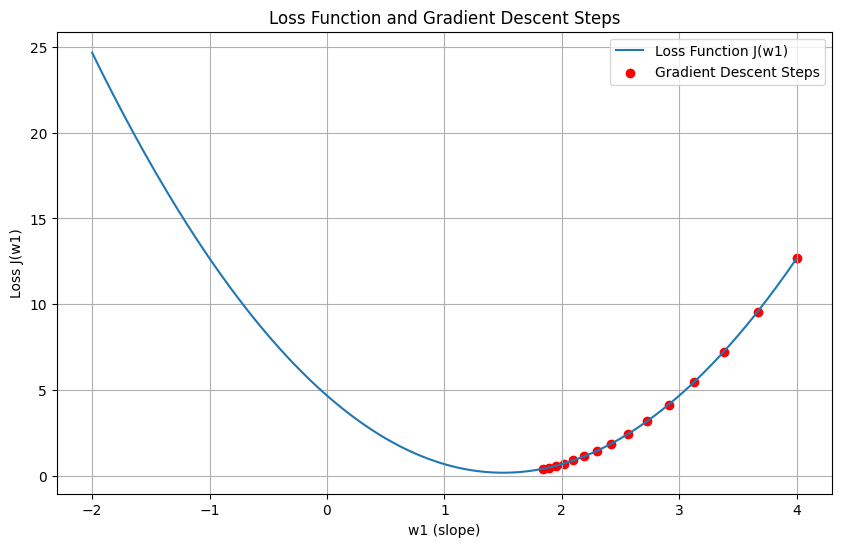

In [177]:
w_space = np.linspace(-2, 4, 200)
loss_space = [loss(w) for w in w_space]

plt.figure(figsize=(10, 6))
plt.plot(w_space, loss_space, label='Loss Function J(w1)')
plt.scatter(w1_values, loss_values, color='red', label='Gradient Descent Steps')
plt.xlabel('w1 (slope)')
plt.ylabel('Loss J(w1)')
plt.title('Loss Function and Gradient Descent Steps')
plt.legend()
plt.grid(True)
plt.show()